<a href="https://colab.research.google.com/github/iamharkirat/Machine-Learning-Projects/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import zipfile
# from tqdm import tqdm

# zip_file_path = '/content/drive/MyDrive/data_egr598/main_data/maindata.zip'
# extract_path = '/content/drive/MyDrive/data_egr598/main_data/'

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     files = zip_ref.namelist()
#     for file in tqdm(files, desc="Extracting", unit="files"):
#         zip_ref.extract(file, extract_path)

In [4]:
df1=pd.read_csv('/content/drive/MyDrive/data_egr598/main_data/maindata/data/data.csv')
df2=pd.read_csv('/content/drive/MyDrive/data_egr598/main_data/maindata/data_01/data.csv')
df3=pd.read_csv('/content/drive/MyDrive/data_egr598/main_data/maindata/data_02/data.csv')
# df4=pd.read_csv('/content/drive/MyDrive/data_egr598/main_data/maindata/data_03/data.csv')

In [5]:
# Remove the 'data/' prefix from the image_path column
df1['image_path'] = df1['image_path'].str.replace('data/', '')
df2['image_path'] = df2['image_path'].str.replace('data/', '')
df3['image_path'] = df3['image_path'].str.replace('data/', '')
# df4['image_path'] = df4['image_path'].str.replace('data/', '')

# Add the '/content/drive/MyDrive/data_egr598/' prefix to the image_path column
df1['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data/' + df1['image_path'].str.replace('.png', '.png')
df2['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data_01/' + df2['image_path'].str.replace('.png', '.png')
df3['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data_02/' + df3['image_path'].str.replace('.png', '.png')
# df4['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data_03/' + df4['image_path'].str.replace('.png', '.png')


<ipython-input-5-ebe7985d3ebd>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data/' + df1['image_path'].str.replace('.png', '.png')
<ipython-input-5-ebe7985d3ebd>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data_01/' + df2['image_path'].str.replace('.png', '.png')
<ipython-input-5-ebe7985d3ebd>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['image_path'] = '/content/drive/MyDrive/data_egr598/main_data/maindata/data_02/' + df3['image_path'].str.replace('.png', '.png')


In [6]:
# Add a column to each dataframe to indicate the source
df1['source'] = 'data'
df2['source'] = 'data_01'
df3['source'] = 'data_02'
# df4['source'] = 'data_03'

# Combine the dataframes into one dataframe
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,timestamp,image_path,linear_x,angular_z,source
0,1.681958e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data
1,1.681958e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data
2,1.681958e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data
3,1.681958e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data
4,1.681958e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data


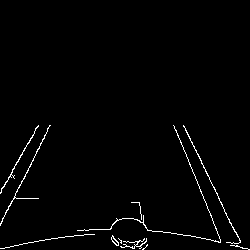

In [7]:
import cv2
import numpy as np
from PIL import Image

# Open the image file
img = Image.open('/content/drive/MyDrive/data_egr598/main_data/maindata/data_01/1681956220.716585.png')

# Convert the image to grayscale
gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

# Create a mask to select only the lower half of the image
mask = np.zeros_like(gray)
mask[int(mask.shape[0] / 4):, :] = 255

# Apply the Canny filter to the masked image
canny = cv2.Canny(cv2.bitwise_and(gray, gray, mask=mask), 100, 200)

# Set the upper half of the image to black
canny[:int(mask.shape[0] / 2), :] = 0

# Convert the filtered image back to PIL Image and show it
canny_img = Image.fromarray(canny)
canny_img.show()

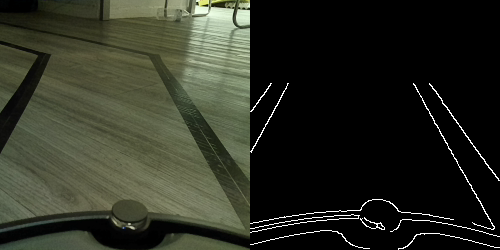

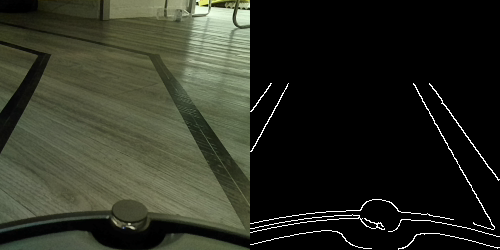

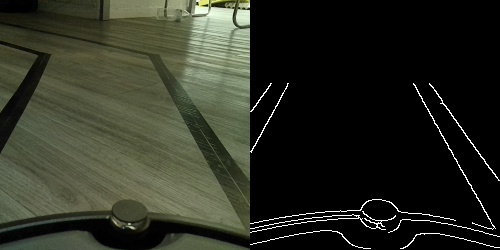

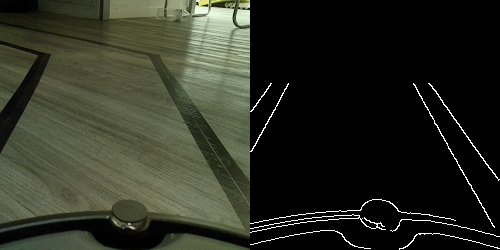

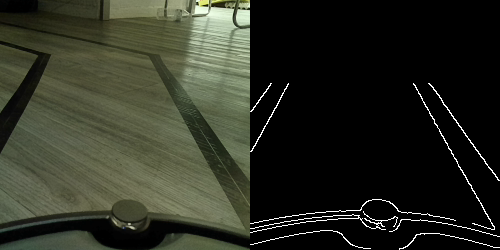

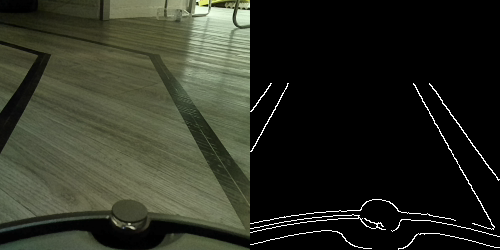

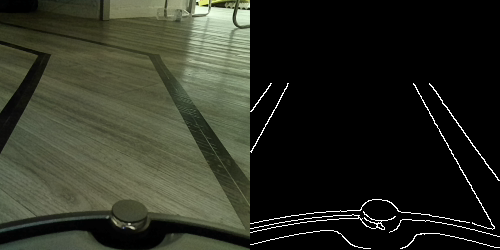

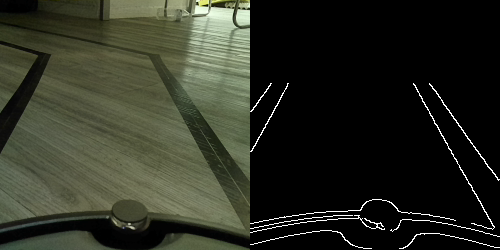

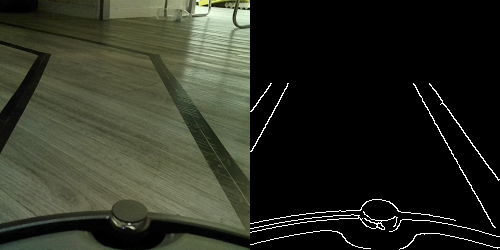

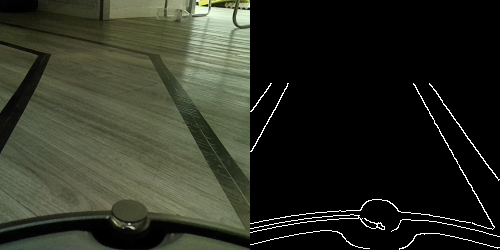

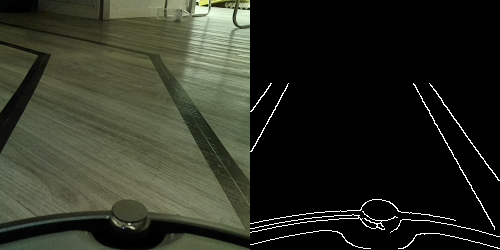

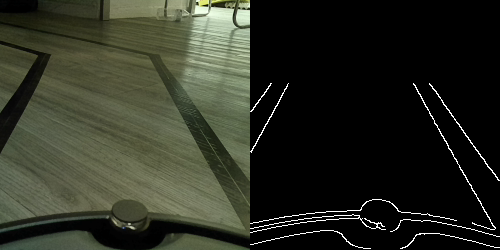

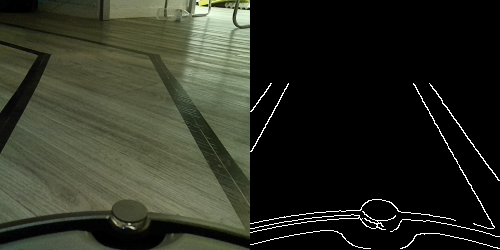

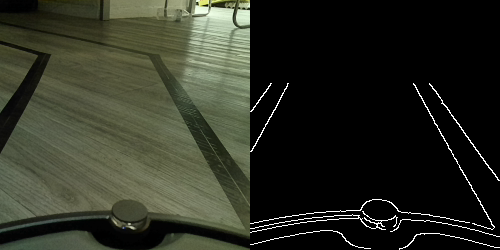

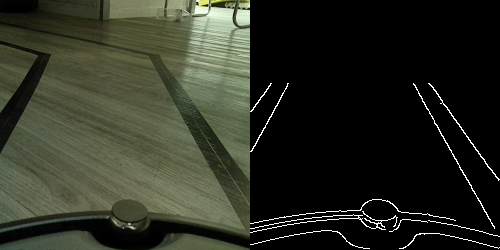

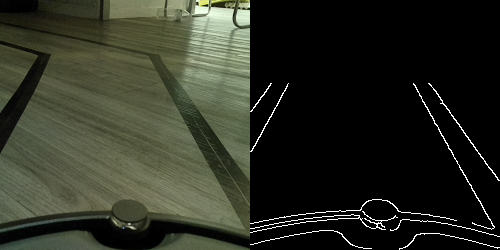

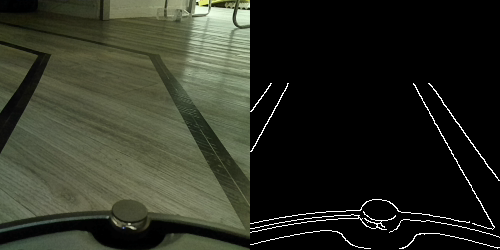

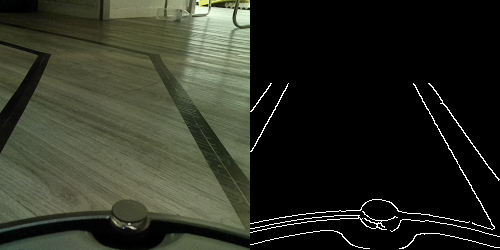

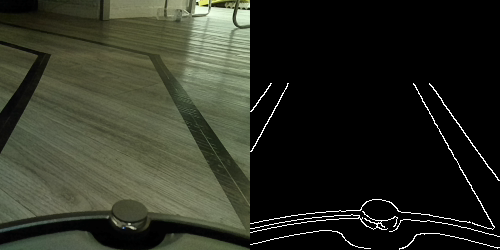

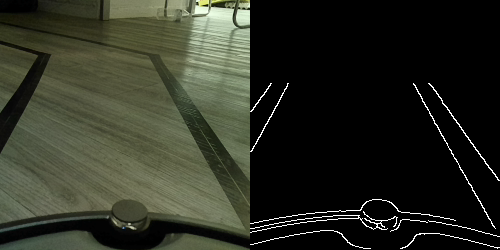

In [8]:
# Loop over the selected images
for index, row in df.head(20).iterrows():
    # Open the image file
    img = Image.open(row['image_path'])

    # Convert the image to grayscale
    gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

    # Apply Gaussian blur to the image
    gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Create a mask to select only the lower half of the image
    mask = np.zeros_like(gray_blur)
    mask[int(mask.shape[0] / 5):, :] = 255

    # Apply the Canny filter to the masked image
    canny = cv2.Canny(cv2.bitwise_and(gray_blur, gray_blur, mask=mask), 50, 150)

    # Set the upper half of the image to black
    canny[:int(mask.shape[0] / 3), :] = 0

    # Convert the filtered image back to PIL Image
    canny_img = Image.fromarray(canny)

    # Show the original image and the filtered image side by side
    combined_img = Image.new('RGB', (img.width * 2, img.height))
    combined_img.paste(img, (0, 0))
    combined_img.paste(canny_img, (img.width, 0))
    combined_img.show()


# Model without the canny filter

In [9]:
# import cv2
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from PIL import Image
# from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
# from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split

# # Load the InceptionV3 model with pre-trained weights from ImageNet
# base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Fine-tune the last few layers of the base model
# for layer in base_model.layers[:-2]:
#     layer.trainable = False

# # Add custom layers to the model
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(64, activation='relu')(x)
# predictions = Dense(2, activation='linear')(x)

# # Create the model with the custom layers
# model = Model(inputs=base_model.input, outputs=predictions)

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# # Define image augmentation parameters
# datagen = ImageDataGenerator(rotation_range=20,
#                              width_shift_range=0.2,
#                              height_shift_range=0.2,
#                              horizontal_flip=True)

# # Preprocess the image data and labels
# images = []
# labels = []
# for index, row in df.iterrows():
#     img_path = row['image_path']
#     img = Image.open(img_path)
#     img = img.convert("RGB")
#     img = img.resize((224, 224))
#     img = tf.keras.preprocessing.image.img_to_array(img)
#     img = preprocess_input(img)
#     images.append(img)
#     label = np.array([row['linear_x'], row['angular_z']])
#     labels.append(label)
    
# X = np.array(images)
# y = np.array(labels)

# # Fit the datagen to the data and perform image augmentation
# datagen.fit(X)

In [10]:
# # Split the dataset into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the datagen to the training data and perform image augmentation
# datagen.fit(X_train)

# # Train the model and save the history
# history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
#                     validation_data=(X_val, y_val),
#                     epochs=10)

# # Plot the training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# Augment the Data

In [11]:
df.head()

,timestamp,image_path,linear_x,angular_z,source
0,1.681958e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data
1,1.681958e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data
2,1.681958e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data
3,1.681958e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data
4,1.681958e+09,/content/drive/MyDrive/data_egr598/main_data/m...,0.0,0.0,data


In [12]:
df_test=df.copy()

In [13]:
df['angular_z'].value_counts()

 0.000000    2937
-0.079766     352
 0.079766     348
Name: angular_z, dtype: int64

In [14]:
import pandas as pd
import numpy as np

# group the dataframe by angular_z
grouped = df_test.groupby('angular_z')

# create a new dataframe with equal number of rows for each angular_z value
df_resampled = pd.DataFrame(columns=['image_path', 'angular_z'])
for name, group in grouped:
    group_len = len(group)
    repeat_factor = max(df_test['angular_z'].value_counts()) // group_len
    remainder = max(df_test['angular_z'].value_counts()) % group_len
    for i in range(repeat_factor):
        df_resampled = pd.concat([df_resampled, group])
    if remainder > 0:
        df_resampled = pd.concat([df_resampled, group.sample(n=remainder)])


In [15]:
df_resampled.head()

,image_path,angular_z,timestamp,linear_x,source
1299,/content/drive/MyDrive/data_egr598/main_data/m...,-0.079766,1.681958e+09,0.0,data
1300,/content/drive/MyDrive/data_egr598/main_data/m...,-0.079766,1.681958e+09,0.0,data
1301,/content/drive/MyDrive/data_egr598/main_data/m...,-0.079766,1.681958e+09,0.0,data
1302,/content/drive/MyDrive/data_egr598/main_data/m...,-0.079766,1.681958e+09,0.0,data
1303,/content/drive/MyDrive/data_egr598/main_data/m...,-0.079766,1.681958e+09,0.0,data


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   3637 non-null   float64
 1   image_path  3637 non-null   object 
 2   linear_x    3637 non-null   float64
 3   angular_z   3637 non-null   float64
 4   source      3637 non-null   object 
dtypes: float64(3), object(2)
memory usage: 142.2+ KB


In [17]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8811 entries, 1299 to 471
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_path  8811 non-null   object 
 1   angular_z   8811 non-null   float64
 2   timestamp   8811 non-null   float64
 3   linear_x    8811 non-null   float64
 4   source      8811 non-null   object 
dtypes: float64(3), object(2)
memory usage: 413.0+ KB


In [18]:
df_resampled['angular_z'].value_counts()

-0.079766    2937
 0.000000    2937
 0.079766    2937
Name: angular_z, dtype: int64

In [19]:
df_resampled = df_resampled.reset_index(drop=True)
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8811 entries, 0 to 8810
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_path  8811 non-null   object 
 1   angular_z   8811 non-null   float64
 2   timestamp   8811 non-null   float64
 3   linear_x    8811 non-null   float64
 4   source      8811 non-null   object 
dtypes: float64(3), object(2)
memory usage: 344.3+ KB


In [20]:
# Get 1200 samples for each unique value of angular_z
sample_size = 1200
unique_z = df['angular_z'].unique()

sampled_data = pd.concat([
    df[df['angular_z'] == z].sample(n=sample_size, random_state=42, replace=True)
    for z in unique_z
])

# Reset the index of the sampled data
sampled_data = sampled_data.reset_index(drop=True)

In [21]:
sampled_data['angular_z'].value_counts()

 0.000000    1200
 0.079766    1200
-0.079766    1200
Name: angular_z, dtype: int64

# Build & Apply the Model

In [ ]:
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

def apply_canny_filter(img_path):
    img = Image.open(img_path)
    gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    mask = np.zeros_like(gray)
    mask[int(mask.shape[0] / 5):, :] = 255
    canny = cv2.Canny(cv2.bitwise_and(gray, gray, mask=mask), 100, 200)
    canny[:int(mask.shape[0] / 3), :] = 0
    canny_img = Image.fromarray(canny)
    return canny_img

# Load the InceptionV3 model with pre-trained weights from ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tune the last few layers of the base model
for layer in base_model.layers[:-2]:
    layer.trainable = False

# Add custom layers to the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(2, activation='linear')(x)

# Create the model with the custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Define image augmentation parameters
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

# Preprocess the image data and labels
images = []
labels = []
for index, row in df.iterrows():
    img_path = row['image_path']
    img = apply_canny_filter(img_path)
    img = img.convert("RGB")
    img = img.resize((224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = preprocess_input(img)
    images.append(img)
    label = np.array([row['linear_x'], row['angular_z']])
    labels.append(label)
    
X = np.array(images)
y = np.array(labels)

# Fit the datagen to the data and perform image augmentation
datagen.fit(X)

In [ ]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the datagen to the training data and perform image augmentation
datagen.fit(X_train)

# Train the model and save the history
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=15)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Save the model
model.save('my_model.h5')

In [ ]:
import pandas as pd
from tensorflow import keras
from PIL import Image
import numpy as np

# Load the saved model
model = keras.models.load_model('my_model_resampled.h5')

# Select 20 random rows from the dataframe
random_rows = df.sample(n=20)

# Define lists to store the predicted linear_x and angular_x values
predicted_linear_x = []
predicted_angular_x = []

# Loop through each row and make predictions
for index, row in random_rows.iterrows():
    # Open the image file and resize it to the input size of the model
    img = Image.open(row['image_path']).resize((224, 224))
    
    # Convert the image to a numpy array and normalize it
    img_np = np.array(img) / 255.0
    
    # Reshape the array to match the input shape of the model
    img_np = img_np.reshape((1, 224, 224, 3))
    
    # Make a prediction using the model
    prediction = model.predict(img_np)
    
    # Extract the linear_x and angular_x values from the prediction
    linear_x = prediction[0][0]
    angular_x = prediction[0][1]
    
    # Append the predicted values to the lists
    predicted_linear_x.append(linear_x)
    predicted_angular_x.append(angular_x)

# Create a pandas dataframe to compare the predicted values with the actual values
results_df = pd.DataFrame({'Actual Linear X': random_rows['linear_x'], 'Actual Angular X': random_rows['angular_z'], 
                           'Predicted Linear X': predicted_linear_x, 'Predicted Angular X': predicted_angular_x})

# Display the dataframe
results_df
